In [94]:
import numpy as np
from scipy.sparse import identity
import numpy as np
from scipy import sparse
from scipy.sparse import lil_matrix
import scipy.sparse.linalg
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator
import sys
from qiskit import*
from qiskit import Aer
import qiskit.quantum_info as qi
import numpy as np
import re
from scipy.sparse import identity
import numpy as np
from scipy import sparse
from scipy.sparse import lil_matrix
import scipy.sparse.linalg

In [139]:
def MCX_Q(c,t,N):
    ## Changing the simulator 
    backend = Aer.get_backend('unitary_simulator')

    ## The circuit without measurement
    circ = QuantumCircuit(N)
    circ.mcx(c,t)

    ## job execution and getting the result as an object
    job = execute(circ, backend)
    result = job.result()

    ## get the unitary matrix from the result object
    return np.matrix(result.get_unitary(circ))

In [15]:
def MCX(c,t,N):
    
    '''
    
    A multicontrolled U gate with controls c (list) and target qubit t is given by 
    
    I x I x ... x I x I - PI1 x PI1 x ... x PI1 x PI1 + PI1 x PI1 x ... x PI1 x U.
    
    
    '''
    
    p0 = ['I']*N
    p1 = ['I']*N
    
    if type(c) == list:
        
        for i in c:
            p0[i] = 'PI_1'
            p1[i] = 'PI_1'
    else:
        p0[c] = 'PI_1'
        p1[c] = 'PI_1'
    p0[t] = 'I'
    p1[t] = 'U'
    
    I = np.identity(2)
    Z = np.matrix([[1,0],[0,-1]])
    X = np.matrix([[0,1],[1,0]])
    PI_0 = (I+Z)/2
    PI_1 = (I-Z)/2
    

    U = X
        

    Matrices = {'I':I,'PI_0':PI_0,'U':U, 'PI_1':PI_1}
    

    PI_0_matrix = Matrices[p0[0]]
    for i in range(1,N):
        PI_0_matrix = sparse.kron(PI_0_matrix, Matrices[p0[i]])
        
    PI_1_matrix = Matrices[p1[0]]
    for i in range(1,N):
        PI_1_matrix = sparse.kron(PI_1_matrix, Matrices[p1[i]])
        
    return np.identity(2**N)-PI_0_matrix+PI_1_matrix

In [67]:
#N = 3
def Hadamard_gate(): # Hadamad gate acting on one qubit.
    
    return 1/np.sqrt(2)*np.array([[1,1],[1,-1]])

def RY(theta):
    return np.array([[np.cos(theta/2), -np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]])

def PauliZ():
    return np.array([[1,0],[0,-1]])

# H = RY(pi/2)*Z

def Hadamard(Qubit,N): 

    '''

    List below will hold gates acting on one qubit. For example, for L = 3,
    the Hadamard gate acting on the qubit 1 is given by = 1 x H x 1, where 
    x is the Kronecker product. Then, qubits_list = [1,H,1].

    ''' 

    qubits_list = [] 
    
    for i in range(N):
        
        if i == Qubit: # Qubit^th position in the list is H.
            
            qubits_list.append(np.matmul(RY(np.pi/2),PauliZ()))
            
        else: # Other gates are identity operators.
            
            qubits_list.append(np.identity(2))

    '''
    
    The following loop performs the Kronecker product.

    '''        
    
    M = sparse.csr_matrix(qubits_list[0]) # Initializes the final matrix.
    
    for g in range(1,len(qubits_list)):
        
        M = sparse.kron(M, qubits_list[g]) # kronecker product.
        
    return M

In [18]:
def Rz_matrix(theta):

    return np.matrix([[np.exp(-1j*theta/2),0],[0,np.exp(1j*theta/2)]])

def Rz(Angle, Qubit):
    
    if Qubit > N -1 :
        
        print("Qubit number exceeds N")
        
    else:    
    
        qubits_list = []
    
        for i in range(N):
        
            if i == Qubit:
            
                qubits_list.append(Rz_matrix(Angle))
            
            else:
            
                qubits_list.append(np.matrix(np.identity(2)))
    
        M = sparse.csr_matrix(qubits_list[0])
    
        for g in range(1,len(qubits_list)):
        
            M = sparse.kron(qubits_list[g], M) # kronecker product.
        
        return M

In [19]:
def Ry_matrix(theta):

    return np.matrix([[np.cos(theta/2), np.sin(theta/2)],[-np.sin(theta/2),np.cos(theta/2)]])

def Ry(Angle, Qubit):
    
    if Qubit > N -1 :
        
        print("Qubit number exceeds N")
        
    else:    
    
        qubits_list = []
    
        for i in range(N):
        
            if i == Qubit:
            
                qubits_list.append(Ry_matrix(Angle))
            
            else:
            
                qubits_list.append(np.matrix(np.identity(2)))
    
        M = sparse.csr_matrix(qubits_list[0])
    
        for g in range(1,len(qubits_list)):
        
            M = sparse.kron(qubits_list[g], M) # kronecker product.
        
        return M

# Reduced Toffoli gate

In [198]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

def Reduced_Toffoli(Input_String):

    qc = QuantumCircuit(3)  # Create a quantum circuit with one qubit
    #one  = [0,1] # Define initial_state as |1>
    #zero = [1,0] 
    
    BITS = {'1':[0,1], '0':[1,0]}
    
    qc.initialize( BITS[Input_String[0]] , 0) # Apply initialisation operation to the 0th qubit
    qc.initialize(BITS[Input_String[1]], 1)
    qc.initialize(BITS[Input_String[2]], 2)
    

    ''' Circuit starts here   '''

    qc.h(2)
    qc.cx(1,2)
    qc.rz(-np.pi/4,2)
    qc.cx(0,2)
    qc.rz(np.pi/4,2)
    qc.cx(1,2)
    
    #qc.rz(np.pi/4,1)
    
    qc.rz(-np.pi/4,2)
    qc.cx(0,2)
    
   #qc.cx(0,1)

    qc.rz(np.pi/4,2)
    
    #qc.rz(np.pi/4,0)
    #qc.rz(-np.pi/4,1)
    
    qc.h(2)
    
    #qc.cx(0,1)

    ''' Circuit ends here   '''

    
    
    qc.save_statevector() 
    qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
    result = sim.run(qobj).result() # Do the simulation and return the result

    out_state = result.get_statevector()
    #print(out_state) # Display the output state vector
    
    
    qobj = assemble(qc)
    result = sim.run(qobj).result()
    counts = result.get_counts()
    return qc,counts


In [202]:
for string in Bin3:
    print('Input :', string[::-1], '\t output :', Reduced_Toffoli(string)[1])

Input : 000 	 output : {'000': 1.0}
Input : 100 	 output : {'100': 1.0}
Input : 010 	 output : {'010': 1.0}
Input : 001 	 output : {'001': 1.0}
Input : 110 	 output : {'110': 1.0}
Input : 101 	 output : {'101': 1.0}
Input : 011 	 output : {'111': 1.0}
Input : 111 	 output : {'011': 1.0}


In [30]:
#CIRCUIT.measure_all()
#CIRCUIT.draw("mpl")

# $R_{Y}(\theta)$ based Toffoli gate

In [172]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
def RY_Based_Toffoli(Input_String):

    qc = QuantumCircuit(3)  # Create a quantum circuit with one qubit
    #one  = [0,1] # Define initial_state as |1>
    #zero = [1,0] 
    
    BITS = {'1':[0,1], '0':[1,0]}
    
    qc.initialize( BITS[Input_String[0]] , 0) # Apply initialisation operation to the 0th qubit
    qc.initialize(BITS[Input_String[1]], 1)
    qc.initialize(BITS[Input_String[2]], 2)

    ''' Circuit starts here   '''

    qc.ry(np.pi/4,2)
    qc.cx(1,2)
    qc.ry(np.pi/4,2)
    qc.cx(0,2)
    qc.ry(-np.pi/4,2)
    qc.cx(1,2)
    qc.ry(-np.pi/4,2)
    
    ''' Circuit ends here   '''

    qc.save_statevector() 
    qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
    result = sim.run(qobj).result() # Do the simulation and return the result

    out_state = result.get_statevector()
    #print(out_state) # Display the output state vector
    
    
    qobj = assemble(qc)
    result = sim.run(qobj).result()
    counts = result.get_counts()
    return qc,counts

In [177]:
Bin3 = ['000','001','010','100','011','101','110','111']

In [190]:
for string in Bin3:
    print('Input :', string[::-1], '\t output :', RY_Based_Toffoli(string)[1])

Input : 000 	 output : {'000': 1.0}
Input : 100 	 output : {'100': 1.0}
Input : 010 	 output : {'010': 1.0}
Input : 001 	 output : {'001': 1.0}
Input : 110 	 output : {'110': 1.0}
Input : 101 	 output : {'101': 1.0}
Input : 011 	 output : {'111': 1.0}
Input : 111 	 output : {'011': 1.0}


In [179]:
#CIRCUIT.measure_all()
#CIRCUIT.draw("mpl")

# $R_Y$-based CCCX gate with 15 elementary gates

In [237]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
def RY_Based_CCCX_15(Input_String):

    qc = QuantumCircuit(4)  # Create a quantum circuit with one qubit
    #one  = [0,1] # Define initial_state as |1>
    #zero = [1,0] 
    
    BITS = {'1':[0,1], '0':[1,0]}
    
    qc.initialize( BITS[Input_String[0]] , 0) # Apply initialisation operation to the 0th qubit
    qc.initialize(BITS[Input_String[1]], 1)
    qc.initialize(BITS[Input_String[2]], 2)
    qc.initialize(BITS[Input_String[3]], 3)

    ''' Circuit starts here   '''

    qc.ry(3*np.pi/8,3)
    qc.cx(2,3)
    qc.ry(np.pi/8,3)
    qc.cx(1,3)
    qc.ry(-np.pi/8,3)
    qc.cx(2,3)
    qc.ry(np.pi/8,3)
    qc.cx(0,3)
    qc.ry(-np.pi/8,3)
    qc.cx(2,3)
    qc.ry(np.pi/8,3)
    qc.cx(1,3)
    qc.ry(-np.pi/8,3)
    qc.cx(2,3)
    qc.ry(-3*np.pi/8,3)
    
    ''' Circuit ends here   '''

    qc.save_statevector() 
    qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
    result = sim.run(qobj).result() # Do the simulation and return the result

    out_state = result.get_statevector()
    #print(out_state) # Display the output state vector
    
    
    qobj = assemble(qc)
    result = sim.run(qobj).result()
    counts = result.get_counts()
    return qc,counts

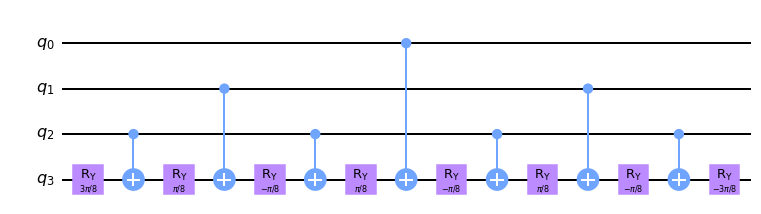

In [324]:
qc15 = QuantumCircuit(4)

qc15.ry(3*np.pi/8,3)
qc15.cx(2,3)
qc15.ry(np.pi/8,3)
qc15.cx(1,3)
qc15.ry(-np.pi/8,3)
qc15.cx(2,3)
qc15.ry(np.pi/8,3)
qc15.cx(0,3)
qc15.ry(-np.pi/8,3)
qc15.cx(2,3)
qc15.ry(np.pi/8,3)
qc15.cx(1,3)
qc15.ry(-np.pi/8,3)
qc15.cx(2,3)
qc15.ry(-3*np.pi/8,3)

qc15.draw("mpl")

In [330]:
print('Depth = '+str(qc15.depth()))
print('Gate count = ' +str(qc15.count_ops()))

Depth = 15
Gate count = OrderedDict([('ry', 8), ('cx', 7)])


In [246]:
Bin4 = ['0000','0001','0010','0011','0101','0110', '0111','1011',
        '0100','1000','1001','1010','1100','1101','1110','1111']

## Input and output check

In [238]:
for string in Bin4:
    print('Input :', string[::-1], '\t output :', RY_Based_CCCX_15(string)[1])

Input : 0000 	 output : {'0000': 0.999999999999999}
Input : 1000 	 output : {'1000': 0.999999999999999}
Input : 0100 	 output : {'0100': 1.0}
Input : 1100 	 output : {'1100': 1.0}
Input : 1010 	 output : {'1010': 0.999999999999999}
Input : 0110 	 output : {'0110': 1.0}
Input : 1110 	 output : {'1110': 1.0}
Input : 1101 	 output : {'1101': 0.999999999999999}
Input : 0010 	 output : {'0010': 0.999999999999999}
Input : 0001 	 output : {'0001': 0.999999999999999}
Input : 1001 	 output : {'1001': 0.999999999999999}
Input : 0101 	 output : {'0101': 0.999999999999999}
Input : 0011 	 output : {'0011': 0.999999999999999}
Input : 1011 	 output : {'1011': 0.999999999999999}
Input : 0111 	 output : {'1111': 1.0}
Input : 1111 	 output : {'0111': 1.0}


# $R_y$ based CCCX gate with 14 elementary gates 

In [318]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
def RY_Based_CCCX_14(Input_String):

    qc = QuantumCircuit(4)  # Create a quantum circuit with one qubit
    #one  = [0,1] # Define initial_state as |1>
    #zero = [1,0] 
    
    BITS = {'1':[0,1], '0':[1,0]}
    
    qc.initialize( BITS[Input_String[0]] , 0) # Apply initialisation operation to the 0th qubit
    qc.initialize(BITS[Input_String[1]], 1)
    qc.initialize(BITS[Input_String[2]], 2)
    qc.initialize(BITS[Input_String[3]], 3)

    ''' Circuit starts here   '''

    qc.ry(np.pi/4,3)
    qc.cx(2,3)
    qc.ry(np.pi/4,3)
    qc.h(3)
    qc.cx(1,3)
    qc.rz(-np.pi/4,3)
    qc.cx(0,3)
    qc.rz(np.pi/4,3)
    qc.cx(1,3)
    qc.rz(-np.pi/4,3)
    qc.cx(0,3)
    qc.rz(-3*np.pi/4,3)
    qc.ry(np.pi/4,3)
    qc.cx(2,3)
    qc.ry(-np.pi/4,3)
    
    ''' Circuit ends here   '''

    qc.save_statevector() 
    qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
    result = sim.run(qobj).result() # Do the simulation and return the result

    out_state = result.get_statevector()
    #print(out_state) # Display the output state vector
    
    
    qobj = assemble(qc)
    result = sim.run(qobj).result()
    counts = result.get_counts()
    return qc,counts

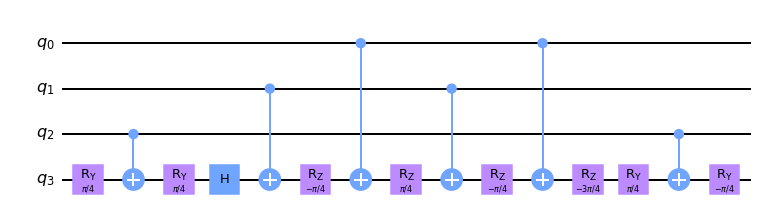

In [321]:
qc14 = QuantumCircuit(4)

qc14.ry(np.pi/4,3)
qc14.cx(2,3)
qc14.ry(np.pi/4,3)
qc14.h(3)
qc14.cx(1,3)
qc14.rz(-np.pi/4,3)
qc14.cx(0,3)
qc14.rz(np.pi/4,3)
qc14.cx(1,3)
qc14.rz(-np.pi/4,3)
qc14.cx(0,3)
qc14.rz(-3*np.pi/4,3)
qc14.ry(np.pi/4,3)
qc14.cx(2,3)
qc14.ry(-np.pi/4,3)
qc14.draw("mpl")

In [331]:
print('Depth = '+str(qc14.depth()))
print('Gate count = ' +str(qc14.count_ops()))

Depth = 15
Gate count = OrderedDict([('cx', 6), ('ry', 4), ('rz', 4), ('h', 1)])


## Input and output

In [319]:
for string in Bin4:
    print('Input :', string[::-1], '\t output :', RY_Based_CCCX_14(string)[1])

Input : 0000 	 output : {'0000': 1.0}
Input : 1000 	 output : {'1000': 1.0}
Input : 0100 	 output : {'0100': 1.0}
Input : 1100 	 output : {'1100': 0.999999999999999}
Input : 1010 	 output : {'1010': 1.0}
Input : 0110 	 output : {'0110': 1.0}
Input : 1110 	 output : {'1110': 0.999999999999999}
Input : 1101 	 output : {'1101': 1.0}
Input : 0010 	 output : {'0010': 1.0}
Input : 0001 	 output : {'0001': 1.0}
Input : 1001 	 output : {'1001': 1.0}
Input : 0101 	 output : {'0101': 1.0}
Input : 0011 	 output : {'0011': 1.0}
Input : 1011 	 output : {'1011': 1.0}
Input : 0111 	 output : {'1111': 1.0}
Input : 1111 	 output : {'0111': 1.0}


# $R_y$ based CCCCX gate

In [263]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
def RY_Based_CCCCX(Input_String):

    qc = QuantumCircuit(5)  # Create a quantum circuit with one qubit
    #one  = [0,1] # Define initial_state as |1>
    #zero = [1,0] 
    
    BITS = {'1':[0,1], '0':[1,0]}
    
    qc.initialize(BITS[Input_String[0]], 0) # Apply initialisation operation to the 0th qubit
    qc.initialize(BITS[Input_String[1]], 1)
    qc.initialize(BITS[Input_String[2]], 2)
    qc.initialize(BITS[Input_String[3]], 3)
    qc.initialize(BITS[Input_String[4]], 4)

    ''' Circuit starts here   '''

    qc.ry(3*np.pi/8,4)
    qc.cx(3,4)
    qc.ry(np.pi/8,4)
    qc.cx(2,4)
    qc.ry(-np.pi/8,4)
    qc.cx(3,4)
    qc.ry(np.pi/8,4)
    qc.h(4)
    qc.cx(1,4)
    qc.rz(-np.pi/4,4)
    qc.cx(0,4)
    qc.rz(np.pi/4,4)
    qc.cx(1,4)
    qc.rz(-np.pi/4,4)
    qc.cx(0,4)
    qc.rz(-3*np.pi/4,4)
    qc.ry(3*np.pi/8,4)
    qc.cx(3,4)
    qc.ry(np.pi/8,4)
    qc.cx(2,4)
    qc.ry(-np.pi/8,4)
    qc.cx(3,4)
    qc.ry(-3*np.pi/8,4)
    
    ''' Circuit ends here   '''

    qc.save_statevector() 
    qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
    result = sim.run(qobj).result() # Do the simulation and return the result

    out_state = result.get_statevector()
    #print(out_state) # Display the output state vector
    
    
    qobj = assemble(qc)
    result = sim.run(qobj).result()
    counts = result.get_counts()
    return qc,counts

In [260]:
Bin5 = [
    '00000',
    '00001',
    '00010',
    '00011',
    '00100',
    '00101',
    '00110',
    '00111',
    '01000',
    '01001',
    '01010',
    '01011',
    '01100',
    '01101',
    '01110',
    '01111',
    '10000',
    '10001',
    '10010',
    '10011',
    '10100',
    '10101',
    '10110',
    '10111',
    '11000',
    '11001',
    '11010',
    '11011',
    '11100',
    '11101',
    '11110',
    '11111'  
]

## Input and output

In [264]:
for string in Bin5:
    print('Input :', string[::-1], '\t output :', RY_Based_CCCCX(string)[1])

Input : 00000 	 output : {'00000': 0.999999999999999}
Input : 10000 	 output : {'10000': 0.999999999999999}
Input : 01000 	 output : {'01000': 0.999999999999999}
Input : 11000 	 output : {'11000': 1.0}
Input : 00100 	 output : {'00100': 0.999999999999999}
Input : 10100 	 output : {'10100': 0.999999999999999}
Input : 01100 	 output : {'01100': 1.0}
Input : 11100 	 output : {'11100': 1.0}
Input : 00010 	 output : {'00010': 0.999999999999999}
Input : 10010 	 output : {'10010': 0.999999999999999}
Input : 01010 	 output : {'01010': 0.999999999999999}
Input : 11010 	 output : {'11010': 0.999999999999999}
Input : 00110 	 output : {'00110': 0.999999999999999}
Input : 10110 	 output : {'10110': 0.999999999999999}
Input : 01110 	 output : {'01110': 0.999999999999999}
Input : 11110 	 output : {'11110': 1.0}
Input : 00001 	 output : {'00001': 0.999999999999999}
Input : 10001 	 output : {'10001': 0.999999999999999}
Input : 01001 	 output : {'01001': 1.0}
Input : 11001 	 output : {'11001': 0.9999999

# Exact Toffoli gate

## Rz control commutation

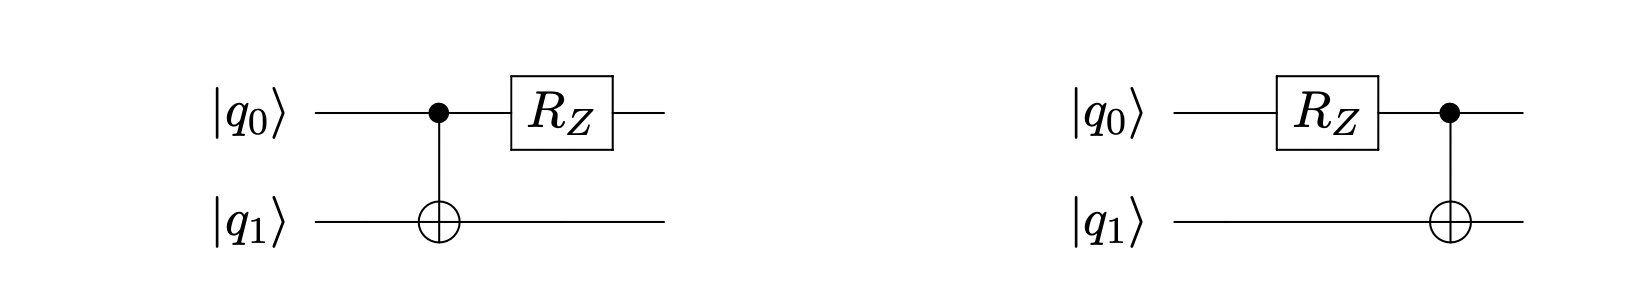

### LHS

$$
CX(0,1)\;  R_{z}(\theta) = \begin{bmatrix}
                            1 & 0 & 0 & 0\\
                            0 & 1 & 0 & 0\\
                            0 & 0 & 0 & 1\\
                            0 & 0 & 1 & 0
                            \end{bmatrix} 
                            \begin{bmatrix}
                            \exp{-i\theta/2} & 0 & 0 & 0\\
                            0 & \exp{-i\theta/2} & 0 & 0\\
                            0 & 0 & \exp{i\theta/2} & 0\\
                            0 & 0 & 0 & \exp{i\theta/2}
                            \end{bmatrix}
                            =\begin{bmatrix}
                            \exp{-i\theta/2} & 0 & 0 & 0\\
                            0 & \exp{-i\theta/2} & 0 & 0\\
                            0 & 0 & 0 & \exp{i\theta/2}\\
                            0 & 0 & \exp{i\theta/2} & 0   
                            \end{bmatrix}$$

### RHS

$$
R_{z}(\theta)\;CX(0,1) = 
                           \begin{bmatrix}
                            \exp{-i\theta/2} & 0 & 0 & 0\\
                            0 & \exp{-i\theta/2} & 0 & 0\\
                            0 & 0 & \exp{i\theta/2} & 0\\
                            0 & 0 & 0 & \exp{i\theta/2}
                            \end{bmatrix}
                            \begin{bmatrix}
                            1 & 0 & 0 & 0\\
                            0 & 1 & 0 & 0\\
                            0 & 0 & 0 & 1\\
                            0 & 0 & 1 & 0
                            \end{bmatrix} 
                            =\begin{bmatrix}
                            \exp{-i\theta/2} & 0 & 0 & 0\\
                            0 & \exp{-i\theta/2} & 0 & 0\\
                            0 & 0 & 0 & \exp{i\theta/2}\\
                            0 & 0 & \exp{i\theta/2} & 0   
                            \end{bmatrix}$$

## Control Control and Target Target commutation

### Target Target commutation

In [274]:
np.nonzero(CX_Q(0,1,3)*CX_Q(1,2,3)*CX_Q(0,2,3)-CX_Q(0,1,3)*CX_Q(0,2,3)*CX_Q(1,2,3))

(array([], dtype=int64), array([], dtype=int64))

### Control Control  commutation

In [275]:
np.nonzero(CX_Q(0,1,3)*CX_Q(0,2,3)*CX_Q(1,2,3)-CX_Q(0,2,3)*CX_Q(0,1,3)*CX_Q(1,2,3))

(array([], dtype=int64), array([], dtype=int64))

### Original Toffoli gate in qiskit

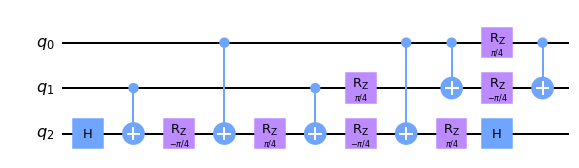

In [334]:
qc1 = QuantumCircuit(3)
qc1.h(2)
qc1.cx(1,2)
qc1.rz(-np.pi/4,2)
qc1.cx(0,2)
qc1.rz(np.pi/4,2)
qc1.cx(1,2)
qc1.rz(np.pi/4,1)
qc1.rz(-np.pi/4,2)
qc1.cx(0,2)
qc1.cx(0,1)
qc1.rz(np.pi/4,2)
qc1.rz(np.pi/4,0)
qc1.rz(-np.pi/4,1)
qc1.h(2)
qc1.cx(0,1)
qc1.draw("mpl")

In [332]:
print('Depth = '+str(qc1.depth()))
print('Gate count = ' +str(qc1.count_ops()))

Depth = 11
Gate count = OrderedDict([('rz', 7), ('cx', 6), ('h', 2)])


### Depth optimized Toffoli gate

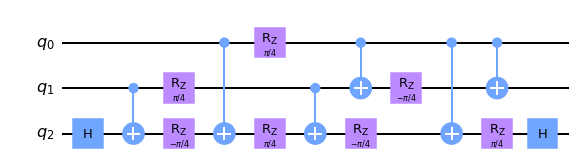

In [470]:
qc2 = QuantumCircuit(3)
qc2.h(2)
qc2.cx(1,2)
qc2.rz(np.pi/4,1)
qc2.rz(-np.pi/4,2)
qc2.cx(0,2)
qc2.rz(np.pi/4,0)
qc2.rz(np.pi/4,2)
qc2.cx(1,2)
qc2.rz(-np.pi/4,2)
qc2.cx(0,1)
qc2.rz(-np.pi/4,1)
qc2.cx(0,2)
qc2.rz(np.pi/4,2)
qc2.cx(0,1)
qc2.h(2)
qc2.draw("mpl")

In [455]:
print('Depth = '+str(qc2.depth()))
print('Gate count = ' +str(qc2.count_ops()))

Depth = 10
Gate count = OrderedDict([('cx', 6), ('rz', 5), ('h', 2)])


### Verification of input output after depth optimization

In [471]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

def Depth_Optimized_Toffoli(Input_String):

    qc2 = QuantumCircuit(3)  # Create a quantum circuit with one qubit
    #one  = [0,1] # Define initial_state as |1>
    #zero = [1,0] 
    
    BITS = {'1':[0,1], '0':[1,0]}
    
    qc2.initialize( BITS[Input_String[0]] , 0) # Apply initialisation operation to the 0th qubit
    qc2.initialize(BITS[Input_String[1]], 1)
    qc2.initialize(BITS[Input_String[2]], 2)

    ''' Circuit starts here   '''

    qc2.h(2)
    qc2.cx(1,2)
    qc2.rz(np.pi/4,1)
    qc2.rz(-np.pi/4,2)
    qc2.cx(0,2)
    qc2.rz(np.pi/4,0)
    qc2.rz(np.pi/4,2)
    qc2.cx(1,2)
    qc2.rz(-np.pi/4,2)
    qc2.cx(0,1)
    qc2.rz(-np.pi/4,1)
    qc2.cx(0,2)
    qc2.rz(np.pi/4,2)
    qc2.cx(0,1)
    qc2.h(2)
    
    ''' Circuit ends here   '''

    qc2.save_statevector() 
    qobj = assemble(qc2)     # Create a Qobj from the circuit for the simulator to run
    result = sim.run(qobj).result() # Do the simulation and return the result

    out_state = result.get_statevector()
    #print(out_state) # Display the output state vector
    
    
    qobj = assemble(qc2)
    result = sim.run(qobj).result()
    counts = result.get_counts()
    return qc2,counts

In [472]:
for string in Bin3:
    print('Input :', string[::-1], '\t output :', Depth_Optimized_Toffoli(string)[1])

Input : 000 	 output : {'000': 1.0}
Input : 100 	 output : {'100': 1.0}
Input : 010 	 output : {'010': 1.0}
Input : 001 	 output : {'001': 1.0}
Input : 110 	 output : {'110': 1.0}
Input : 101 	 output : {'101': 1.0}
Input : 011 	 output : {'111': 1.0}
Input : 111 	 output : {'011': 1.0}


# Exact CCCX gate

### Original CCCX gate in qiskit

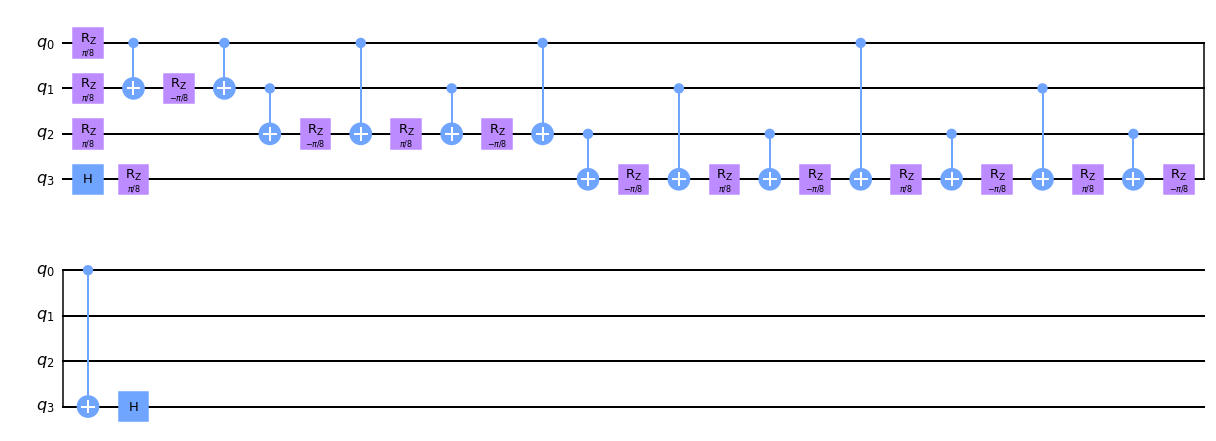

In [479]:
qc3 = QuantumCircuit(4)
qc3.rz(np.pi/8,0)
qc3.rz(np.pi/8,1)
qc3.rz(np.pi/8,2)
qc3.h(3)
qc3.cx(0,1)
qc3.rz(-np.pi/8,1)
qc3.rz(np.pi/8,3)
qc3.cx(0,1)
qc3.cx(1,2)
qc3.rz(-np.pi/8,2)
qc3.cx(0,2)
qc3.rz(np.pi/8,2)
qc3.cx(1,2)
qc3.rz(-np.pi/8,2)
qc3.cx(0,2)
qc3.cx(2,3)
qc3.rz(-np.pi/8,3)
qc3.cx(1,3)
qc3.rz(np.pi/8,3)
qc3.cx(2,3)
qc3.rz(-np.pi/8,3)
qc3.cx(0,3)
qc3.rz(np.pi/8,3)
qc3.cx(2,3)
qc3.rz(-np.pi/8,3)
qc3.cx(1,3)
qc3.rz(np.pi/8,3)
qc3.cx(2,3)
qc3.rz(-np.pi/8,3)
qc3.cx(0,3)
qc3.h(3)
qc3.draw("mpl")

In [480]:
print('Depth = '+str(qc3.depth()))
print('Gate count = ' +str(qc3.count_ops()))

Depth = 27
Gate count = OrderedDict([('rz', 15), ('cx', 14), ('h', 2)])


In [481]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
def Original_CCCX(Input_String):

    qc3 = QuantumCircuit(4)  # Create a quantum circuit with one qubit
    #one  = [0,1] # Define initial_state as |1>
    #zero = [1,0] 
    
    BITS = {'1':[0,1], '0':[1,0]}
    
    qc3.initialize( BITS[Input_String[0]] , 0) # Apply initialisation operation to the 0th qubit
    qc3.initialize(BITS[Input_String[1]], 1)
    qc3.initialize(BITS[Input_String[2]], 2)
    qc3.initialize(BITS[Input_String[3]], 3)

    ''' Circuit starts here   '''

    qc3.rz(np.pi/8,0)
    qc3.rz(np.pi/8,1)
    qc3.rz(np.pi/8,2)
    qc3.h(3)
    qc3.cx(0,1)
    qc3.rz(-np.pi/8,1)
    qc3.rz(np.pi/8,3)
    qc3.cx(0,1)
    qc3.cx(1,2)
    qc3.rz(-np.pi/8,2)
    qc3.cx(0,2)
    qc3.rz(np.pi/8,2)
    qc3.cx(1,2)
    qc3.rz(-np.pi/8,2)
    qc3.cx(0,2)
    qc3.cx(2,3)
    qc3.rz(-np.pi/8,3)
    qc3.cx(1,3)
    qc3.rz(np.pi/8,3)
    qc3.cx(2,3)
    qc3.rz(-np.pi/8,3)
    qc3.cx(0,3)
    qc3.rz(np.pi/8,3)
    qc3.cx(2,3)
    qc3.rz(-np.pi/8,3)
    qc3.cx(1,3)
    qc3.rz(np.pi/8,3)
    qc3.cx(2,3)
    qc3.rz(-np.pi/8,3)
    qc3.cx(0,3)
    qc3.h(3)
    
    ''' Circuit ends here   '''

    qc3.save_statevector() 
    qobj = assemble(qc3)     # Create a Qobj from the circuit for the simulator to run
    result = sim.run(qobj).result() # Do the simulation and return the result

    out_state = result.get_statevector()
    #print(out_state) # Display the output state vector
    
    
    qobj = assemble(qc3)
    result = sim.run(qobj).result()
    counts = result.get_counts()
    return qc3,counts

### Input Output verification

In [483]:
for string in Bin4:
    print('Input :', string[::-1], '\t output :', Original_CCCX(string)[1])

Input : 0000 	 output : {'0000': 0.999999999999999}
Input : 1000 	 output : {'1000': 0.999999999999999}
Input : 0100 	 output : {'0100': 0.999999999999998}
Input : 1100 	 output : {'1100': 0.999999999999999}
Input : 1010 	 output : {'1010': 0.999999999999999}
Input : 0110 	 output : {'0110': 0.999999999999998}
Input : 1110 	 output : {'1110': 0.999999999999999}
Input : 1101 	 output : {'1101': 0.999999999999999}
Input : 0010 	 output : {'0010': 0.999999999999999}
Input : 0001 	 output : {'0001': 0.999999999999999}
Input : 1001 	 output : {'1001': 0.999999999999999}
Input : 0101 	 output : {'0101': 0.999999999999999}
Input : 0011 	 output : {'0011': 0.999999999999999}
Input : 1011 	 output : {'1011': 0.999999999999999}
Input : 0111 	 output : {'1111': 0.999999999999999}
Input : 1111 	 output : {'0111': 0.999999999999999}


### Depth optimized CCCX gate

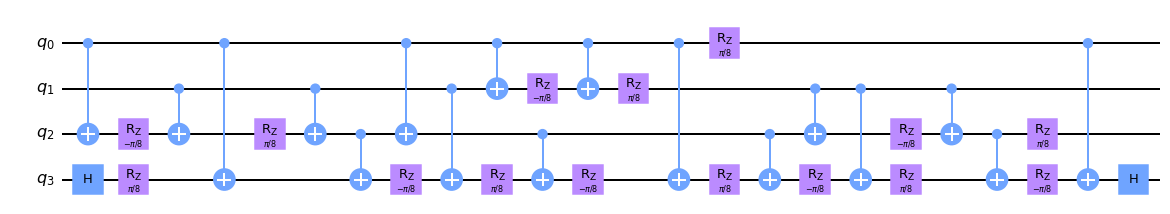

In [427]:
qc4 = QuantumCircuit(4)
qc4.cx(0,2)
qc4.h(3)
qc4.rz(-np.pi/8,2)
qc4.rz(np.pi/8,3)
qc4.cx(1,2)
qc4.cx(0,3)
qc4.rz(np.pi/8,2)
qc4.cx(1,2)
qc4.cx(2,3)
qc4.cx(0,2)
qc4.rz(-np.pi/8,3)
qc4.cx(1,3)
qc4.cx(0,1)
qc4.rz(-np.pi/8,1)
qc4.cx(0,1)
qc4.rz(np.pi/8,3)
qc4.cx(2,3)
qc4.rz(-np.pi/8,3)
qc4.rz(np.pi/8,1)
qc4.cx(0,3)
qc4.rz(np.pi/8,0)
qc4.rz(np.pi/8,3)
qc4.cx(2,3)
qc4.cx(1,2)
qc4.rz(-np.pi/8,3)
qc4.cx(1,3)
qc4.rz(-np.pi/8,2)
qc4.rz(np.pi/8,3)
qc4.cx(1,2)
qc4.cx(2,3)
qc4.rz(np.pi/8,2)
qc4.rz(-np.pi/8,3)
qc4.cx(0,3)
qc4.h(3)
qc4.draw("mpl")

In [473]:
print('Depth = '+str(qc4.depth()))
print('Gate count = ' +str(qc4.count_ops()))

Depth = 21
Gate count = OrderedDict([('cx', 17), ('rz', 15), ('h', 2)])


In [484]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
def Depth_Optimized_CCCX(Input_String):

    qc4 = QuantumCircuit(4)  # Create a quantum circuit with one qubit
    #one  = [0,1] # Define initial_state as |1>
    #zero = [1,0] 
    
    BITS = {'1':[0,1], '0':[1,0]}
    
    qc4.initialize( BITS[Input_String[0]] , 0) # Apply initialisation operation to the 0th qubit
    qc4.initialize(BITS[Input_String[1]], 1)
    qc4.initialize(BITS[Input_String[2]], 2)
    qc4.initialize(BITS[Input_String[3]], 3)

    ''' Circuit starts here   '''

    qc4.cx(0,2)
    qc4.h(3)
    qc4.rz(-np.pi/8,2)
    qc4.rz(np.pi/8,3)
    qc4.cx(1,2)
    qc4.cx(0,3)
    qc4.rz(np.pi/8,2)
    qc4.cx(1,2)
    qc4.cx(2,3)
    qc4.cx(0,2)
    qc4.rz(-np.pi/8,3)
    qc4.cx(1,3)
    qc4.cx(0,1)
    qc4.rz(-np.pi/8,1)
    qc4.cx(0,1)
    qc4.rz(np.pi/8,3)
    qc4.cx(2,3)
    qc4.rz(-np.pi/8,3)
    qc4.rz(np.pi/8,1)
    qc4.cx(0,3)
    qc4.rz(np.pi/8,0)
    qc4.rz(np.pi/8,3)
    qc4.cx(2,3)
    qc4.cx(1,2)
    qc4.rz(-np.pi/8,3)
    qc4.cx(1,3)
    qc4.rz(-np.pi/8,2)
    qc4.rz(np.pi/8,3)
    qc4.cx(1,2)
    qc4.cx(2,3)
    qc4.rz(np.pi/8,2)
    qc4.rz(-np.pi/8,3)
    qc4.cx(0,3)
    qc4.h(3)
    
    ''' Circuit ends here   '''

    qc4.save_statevector() 
    qobj = assemble(qc4)     # Create a Qobj from the circuit for the simulator to run
    result = sim.run(qobj).result() # Do the simulation and return the result

    out_state = result.get_statevector()
    #print(out_state) # Display the output state vector
    
    
    qobj = assemble(qc4)
    result = sim.run(qobj).result()
    counts = result.get_counts()
    return qc4,counts

### Input Output verification after depth optimization

In [485]:
for string in Bin4:
    print('Input :', string[::-1], '\t output :', Depth_Optimized_CCCX(string)[1])

Input : 0000 	 output : {'0000': 0.999999999999998}
Input : 1000 	 output : {'1000': 0.999999999999998}
Input : 0100 	 output : {'0100': 0.999999999999999}
Input : 1100 	 output : {'1100': 0.999999999999998}
Input : 1010 	 output : {'1010': 0.999999999999999}
Input : 0110 	 output : {'0110': 0.999999999999998}
Input : 1110 	 output : {'1110': 0.999999999999999}
Input : 1101 	 output : {'1101': 0.999999999999999}
Input : 0010 	 output : {'0010': 0.999999999999999}
Input : 0001 	 output : {'0001': 0.999999999999999}
Input : 1001 	 output : {'1001': 0.999999999999999}
Input : 0101 	 output : {'0101': 0.999999999999999}
Input : 0011 	 output : {'0011': 0.999999999999998}
Input : 1011 	 output : {'1011': 0.999999999999998}
Input : 0111 	 output : {'1111': 0.999999999999998}
Input : 1111 	 output : {'0111': 0.999999999999998}


### Comparison of the two circuits

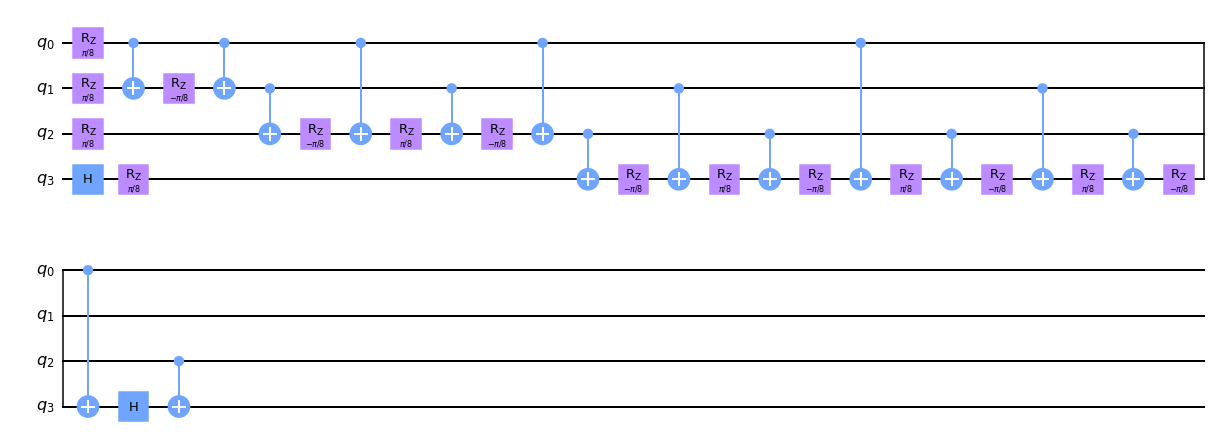

In [477]:
qc3.draw("mpl")

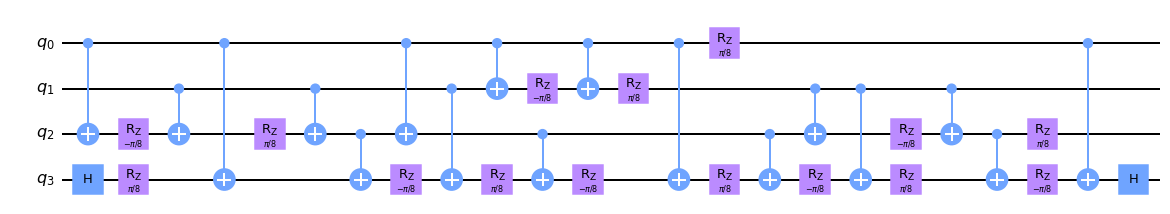

In [475]:
qc4.draw("mpl")

### Depth optimized Toffoli circuit

In [268]:
def CX_Q(c,t,N):
    ## Changing the simulator 
    backend = Aer.get_backend('unitary_simulator')

    ## The circuit without measurement
    circ = QuantumCircuit(N)
    circ.cx(c,t)

    ## job execution and getting the result as an object
    job = execute(circ, backend)
    result = job.result()

    ## get the unitary matrix from the result object
    return np.matrix(result.get_unitary(circ))

In [112]:
def H_Q(q,N):
    ## Changing the simulator 
    backend = Aer.get_backend('unitary_simulator')

    ## The circuit without measurement
    circ = QuantumCircuit(N)
    circ.h(q)

    ## job execution and getting the result as an object
    job = execute(circ, backend)
    result = job.result()

    ## get the unitary matrix from the result object
    return np.matrix(result.get_unitary(circ))

In [113]:
def RZ_Q(theta,q,N):
    ## Changing the simulator 
    backend = Aer.get_backend('unitary_simulator')

    ## The circuit without measurement
    circ = QuantumCircuit(N)
    circ.rz(theta,q)

    ## job execution and getting the result as an object
    job = execute(circ, backend)
    result = job.result()

    ## get the unitary matrix from the result object
    return np.matrix(result.get_unitary(circ))

In [147]:
N = 3
Or = identity(2**N)
Or = Or * H_Q(2,N)
Or = Or * CX_Q(1,2,N)
Or = Or * RZ_Q(-np.pi/4,2,N)
Or = Or * CX_Q(0,2,N)
Or = Or * RZ_Q(np.pi/4,2,N)
Or = Or * CX_Q(1,2,N)

#Or = Or * RZ_Q(np.pi/4,1,N)

Or = Or * RZ_Q(-np.pi/4,2,N)
Or = Or * CX_Q(0,2,N)

#Or = Or * CX_Q(0,1,N)

Or = Or * RZ_Q(np.pi/4,2,N)

#Or = Or * RZ_Q(np.pi/4, 0, N)
#Or = Or * RZ_Q(-np.pi/4, 1,N)

Or = Or * H_Q(2,N)

#Or = Or * CX_Q(0,1,N)

M = Or.A
M = M/M[0,0]


np.nonzero(np.around(MCX_Q([0,1],2,3)-M,8))

(array([3, 7]), array([7, 3]))